In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({"font.size" : 15, "font.family" : "serif"})

### Задача 1

Пусть $y$ - проекция $v$ на $range(A)$, тогда $v-y$ должно быть ортогонально $range(A)$. Так как $y\in range(A)$, то $y=Ax$, условие оротогональности переписывается в виде $A^T(v-Ax)=0$, т.е. $x=(A^TA)^{-1}A^T,\; y = Ax = A (A^TA)^{-1}A^T$. 

Окончательно $P = A (A^TA)^{-1}A^T$ 

*(при выводе сделано предположение, что $A^TA$ обратима, что верно, когда столбцы матрицы $A$ независимы)

$A=\begin{pmatrix} 1 & 0\\ 0 & 1 \\ 1 & 0 \end{pmatrix}, \; (A^TA)^{-1}=\begin{pmatrix} 1/2 & 0 \\ 0 & 1\end{pmatrix}$

$P_A = A(A^TA)^{-1}A^T = \begin{pmatrix} 1/2 & 0 & 1/2\\ 0 & 1 & 0 \\ 1/2 & 0 & 1/2 \end{pmatrix}$

$B=\begin{pmatrix} 1 & 2\\ 0 & 1 \\ 1 & 0 \end{pmatrix}, B^TB = \begin{pmatrix} 2 & 2 \\ 2 & 5\end{pmatrix}, (B^TB)^{-1} = \frac{1}{6}\begin{pmatrix} 5 & -2 \\ -2 & 2\end{pmatrix}$

$P_B =  \frac{1}{6}\begin{pmatrix} 1 & 2\\ 0 & 1 \\ 1 & 0 \end{pmatrix}\begin{pmatrix} 5 & -2 \\ -2 & 2\end{pmatrix} 
\begin{pmatrix} 1 & 0 & 1\\ 2 & 1 & 0 \end{pmatrix} = 
\frac{1}{6}\begin{pmatrix} 5 & 2 & 1\\ 2 & 2 & -2\\ 1 & -2 & 5\end{pmatrix}$

Столбцы матрицы А ортогональны, поэтому QR-разложение ищется просто нормировкой столбцов

$Q = \begin{pmatrix} 1/\sqrt{2} & 0\\ 0 & 1 \\  1/\sqrt{2} & 0\end{pmatrix} , \; R=\begin{pmatrix} \sqrt{2} & 0 \\ 0 & 1\end{pmatrix}$

Ортогонализация Грама-Шмидта для B

$q_1 = \frac{1}{\sqrt{2}}a_1 = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\0\\1\end{pmatrix} = \frac{1}{r_{11}}\begin{pmatrix}1\\0\\1\end{pmatrix}, \; r_{11} = \sqrt{2}$

$u_2 = a_2 - \frac{(a_1, a_2)}{||a_1||^2}a_1 \Leftrightarrow r_{22}q_2 = a_2 - r_{12}q_1, \; u_2 = \begin{pmatrix} 1 \\ 1 \\ - 1\end{pmatrix}, \; q_2 = \frac{1}{\sqrt{3}}\begin{pmatrix} 1 \\ 1 \\ - 1\end{pmatrix}$

$r_{22} = ||u_2|| = \sqrt{3},\; r_{12} = \frac{(a_1, a_2)}{||a_1||}=\sqrt{2}$

$R = \begin{pmatrix}\sqrt{2} & \sqrt{2}\\ 0 & \sqrt{3}\end{pmatrix}, \; Q = \begin{pmatrix} q1\; |  \; q2\end{pmatrix}$

### Задача 2

$m = 1,\; a(10) = \frac{f_1}{2} + \left(f_1 + \frac{f_2}{2}\right) + ... + (f_1+...+\left(f_9 + \frac{f_{10}}{2}\right) = \frac{1}{2}\left( 19f_1 + 17f_2 + ... + f_{10}\right),\; v(10)=f_1+...+f_{10}$

$f = (f_1, ..., f_{10})^T, \; A = \begin{pmatrix} 
\frac{19}{2} & ... & \frac{1}{2} \\
1 & ... & 1
\end{pmatrix}$

Для недоопределённой системы $Af = a$ можно искать решение линейной системы с минимальной 2-нормой $||f||_2$. Метод множителей Лагранжа в таком случае даёт решение $f = A^T(AA^T)^{-1} a$ (right pseudoinverse)

In [21]:
A = np.array([[9.5-i for i in range(10)], np.ones(10)])
a = np.array([1,0]).T

f1 = np.linalg.lstsq(A, a, rcond=None)[0]
f2 = A.T@np.linalg.inv(A@A.T)@a

print(np.allclose(f1, f2))
print(np.allclose(A@f1, a))

True
True


### Задача 3

In [3]:
n = 7
x = np.sort(np.random.uniform(low=0.0, high=6.0, size=n))
y0 = 10*np.sin(x)
y = y0 + np.random.normal(size=n)

p1 = np.polyfit(x, y, deg=1)
p2 = np.polyfit(x, y, deg=3)

f1 = np.poly1d(p1)
f2 = np.poly1d(p2)

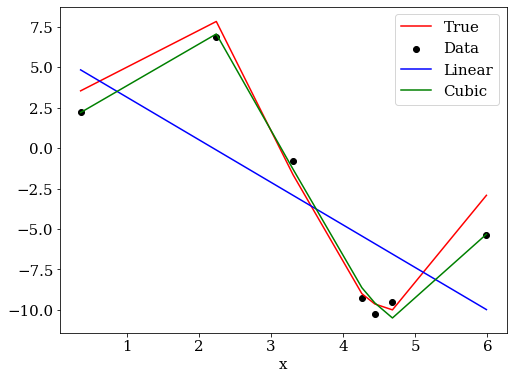

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(x, y0, color="red", label="True")
plt.scatter(x, y, color="black", label="Data")
plt.plot(x, f1(x), color="blue", label="Linear")
plt.plot(x, f2(x), color="green", label="Cubic")
plt.xlabel("x")
plt.legend()

### Задача 4

In [161]:
with np.load("data.npz") as data:
    A, C = data["A"], data["C"]
    
def mat2vec(A):
    return A.flatten()

def vec2mat(a, shape):
    return a.reshape(shape)

print(A.shape)
print(C.shape)

(25, 60)
(1500, 816)


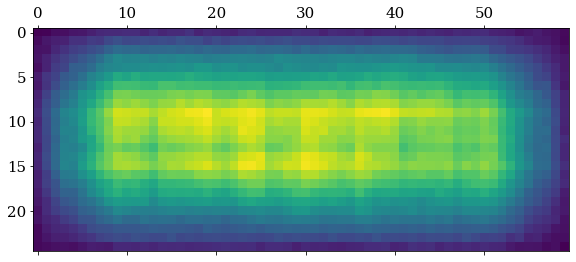

In [150]:
plt.matshow(A)

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_43808/2371967909.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a0 = np.linalg.lstsq(C, a)[0]


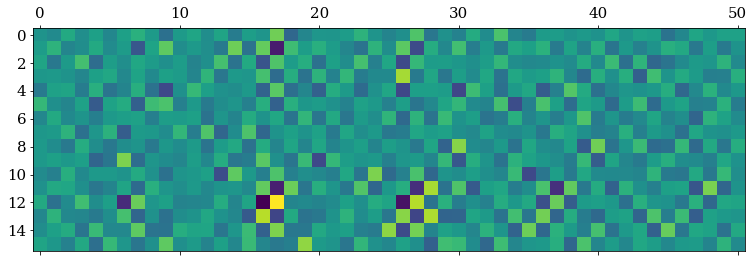

In [173]:
a = mat2vec(A).T
a0 = np.linalg.lstsq(C, a)[0]
A0 = vec2mat(a0, (16, 51))
plt.matshow(A0)

(816,)


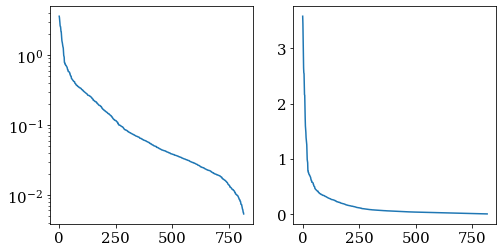

In [183]:
u, s, vh = np.linalg.svd(C, full_matrices=False)
print(s.shape)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.semilogy(s)
plt.subplot(122)
plt.plot(s)

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_43808/88012303.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(s1, u1.T@a)[0]
/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_43808/88012303.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(A1)


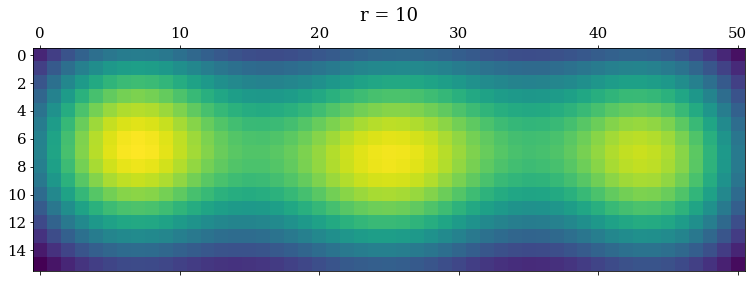

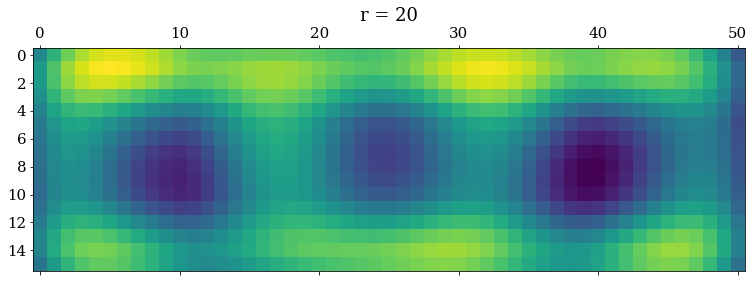

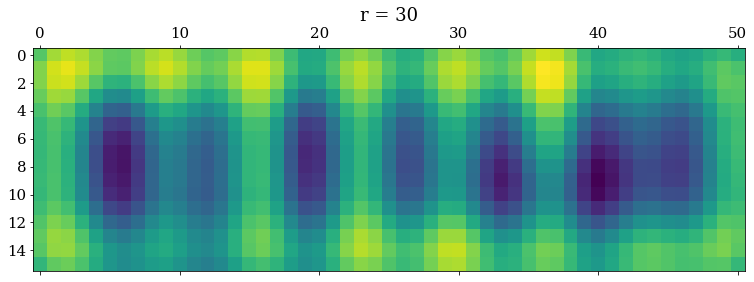

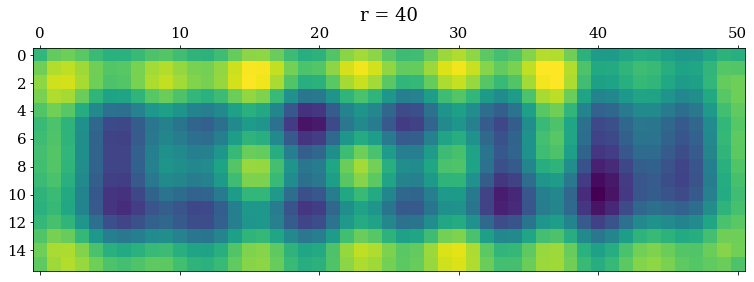

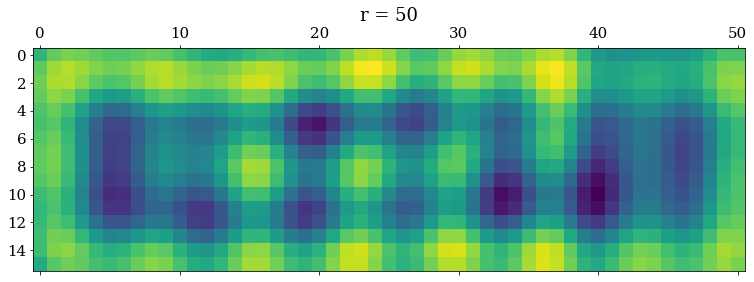

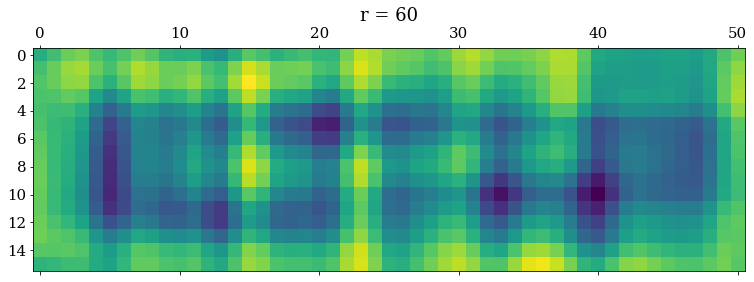

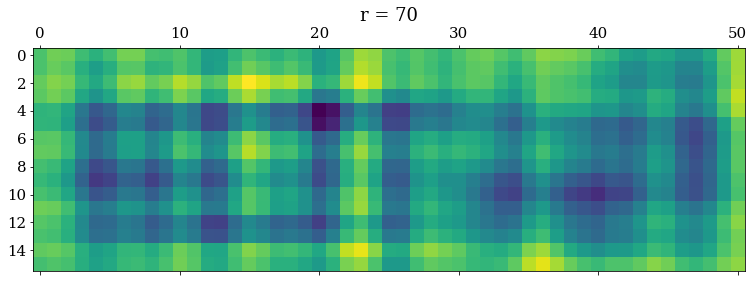

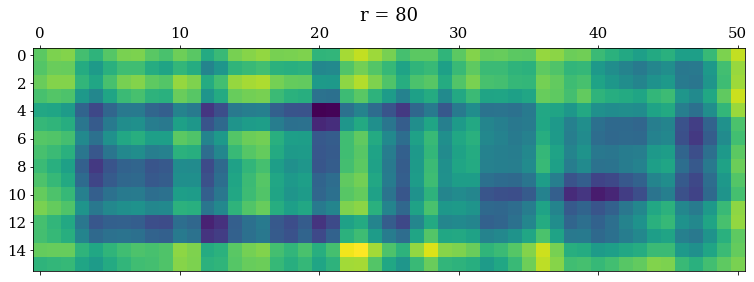

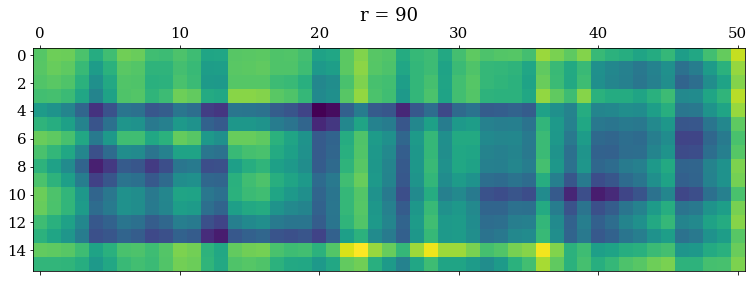

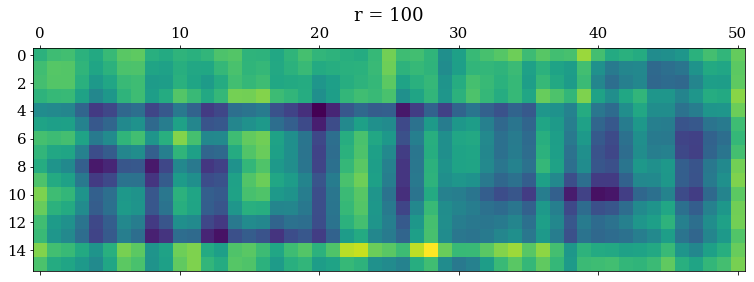

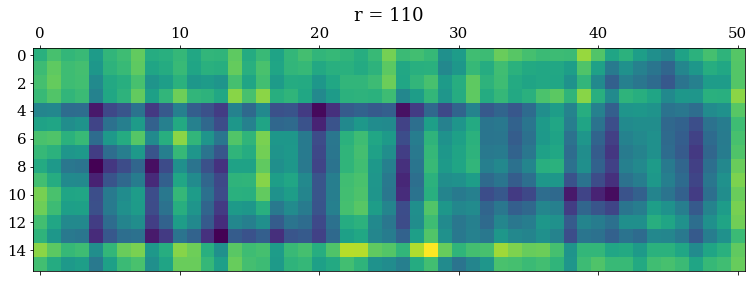

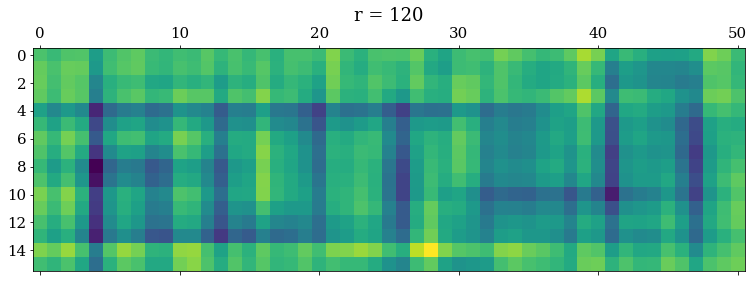

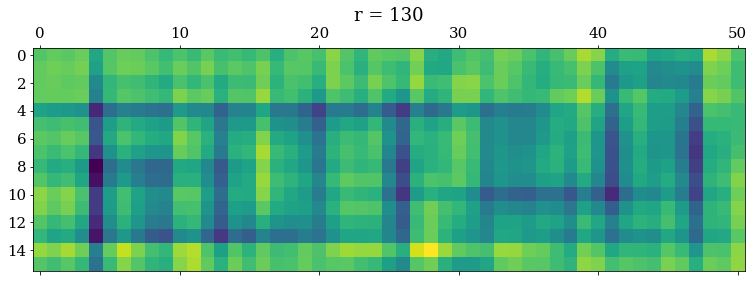

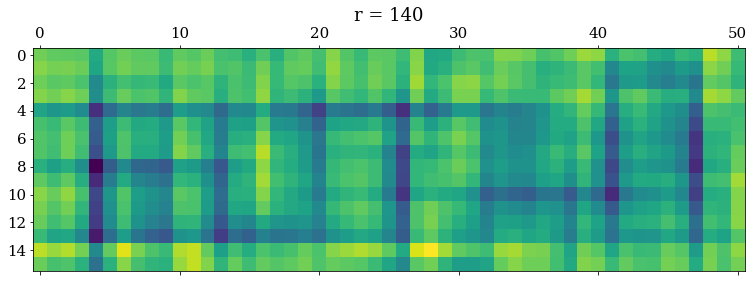

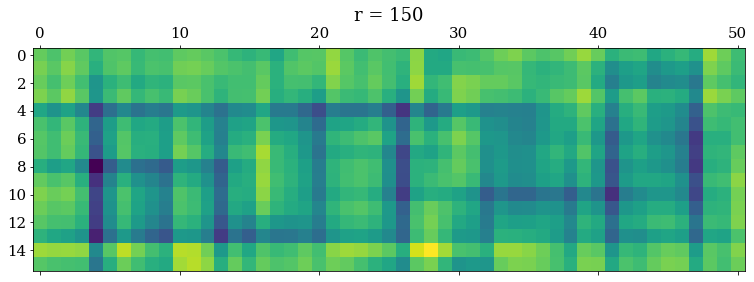

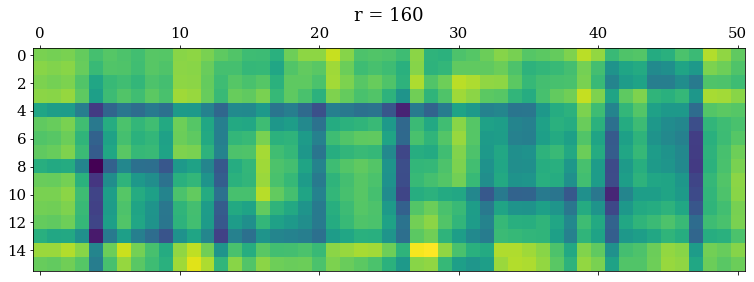

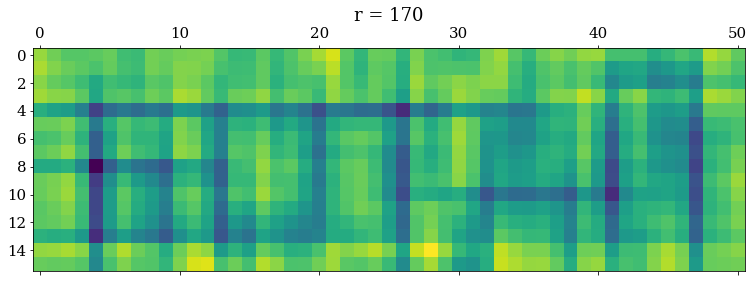

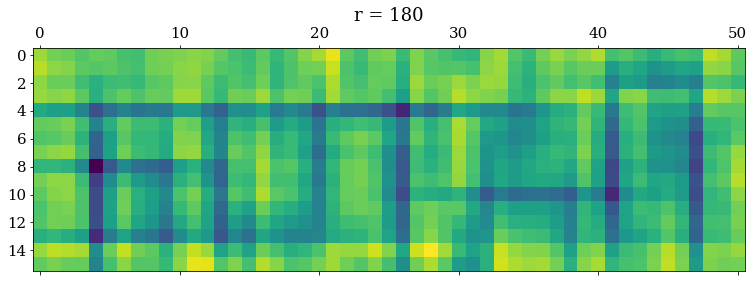

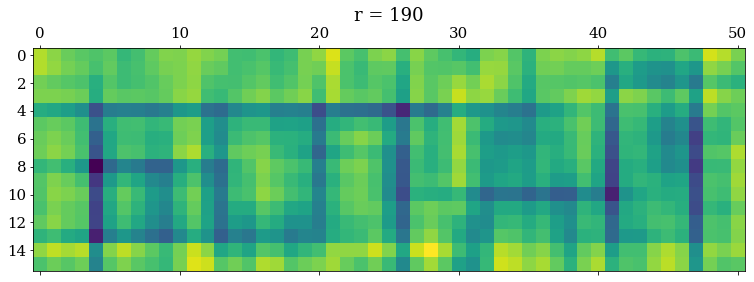

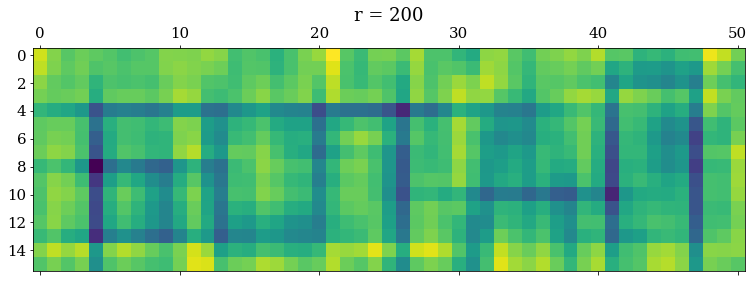

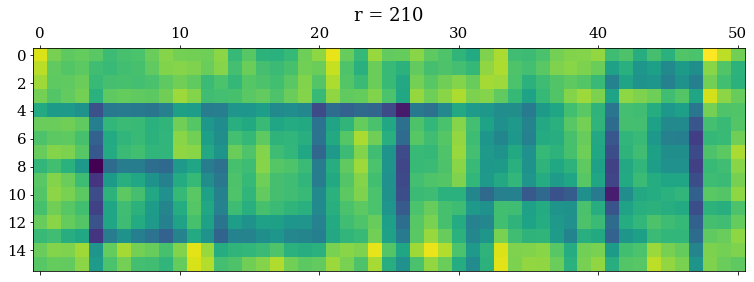

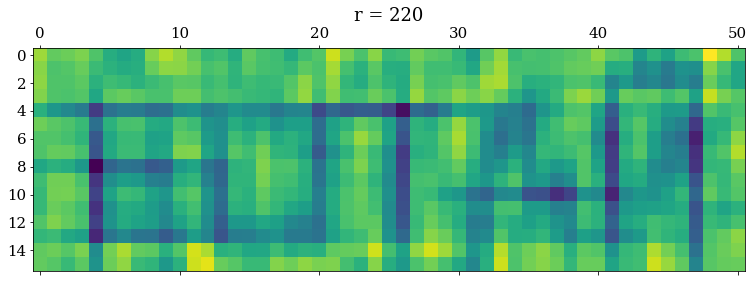

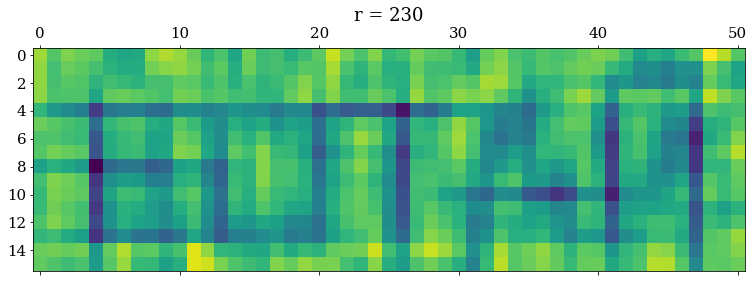

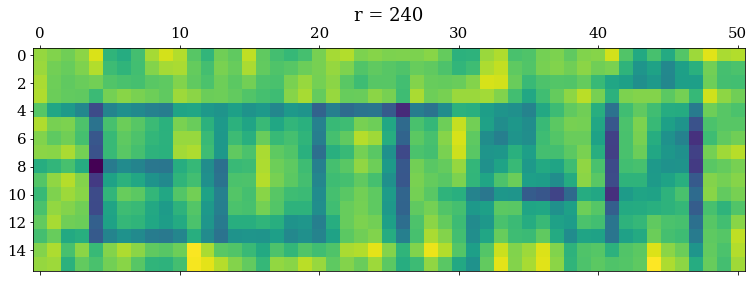

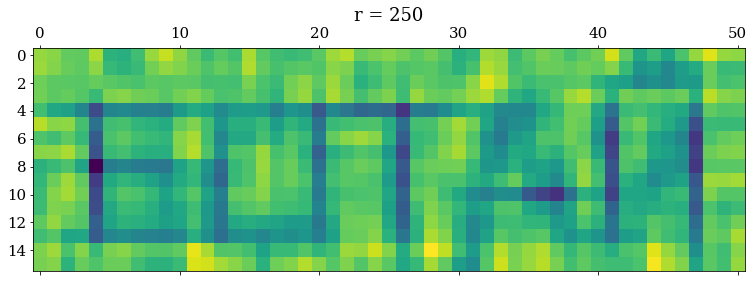

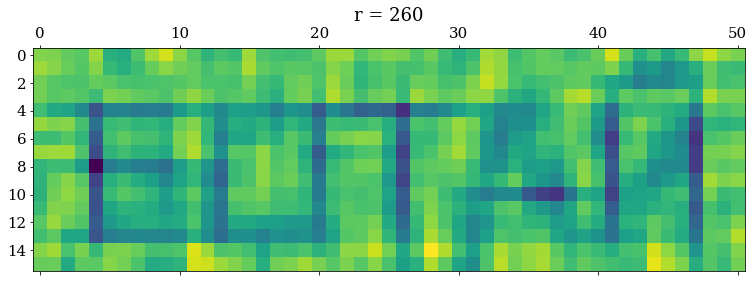

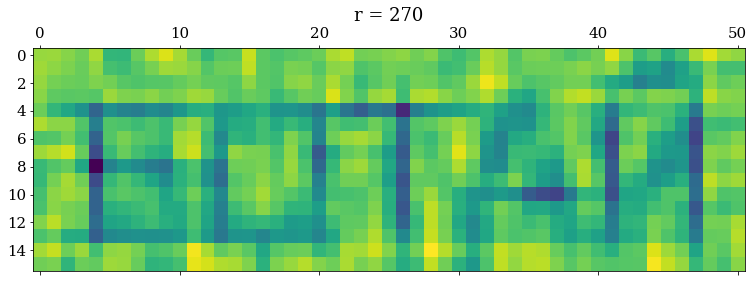

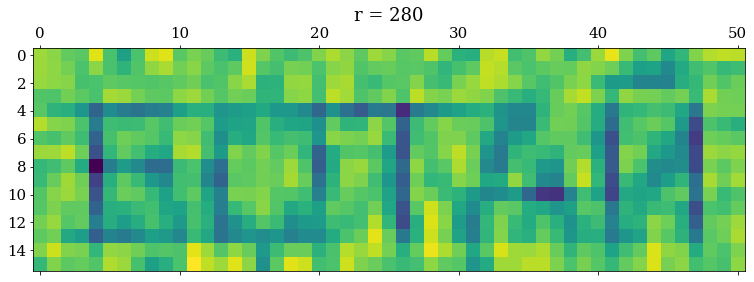

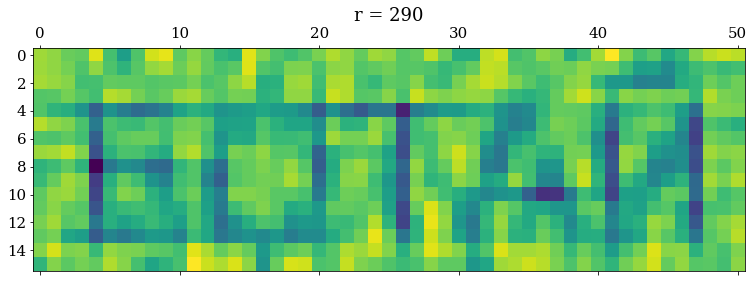

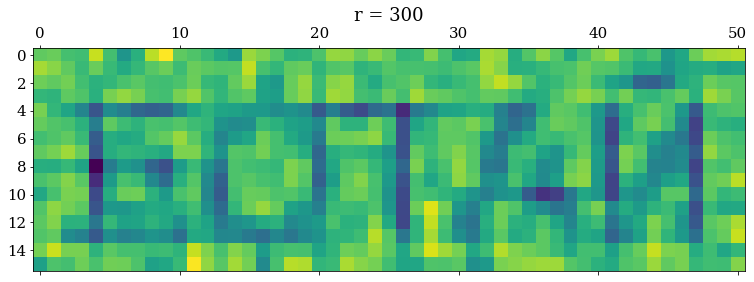

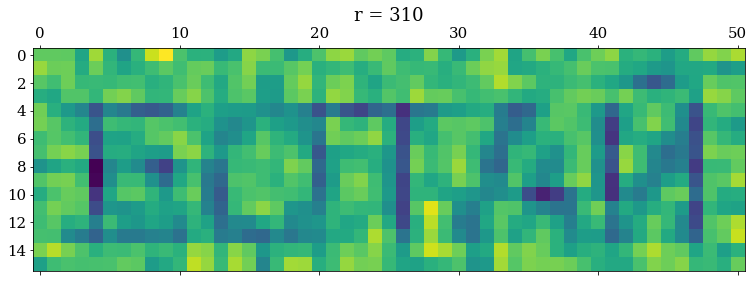

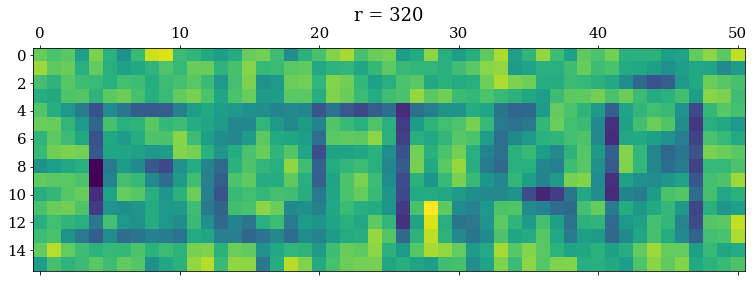

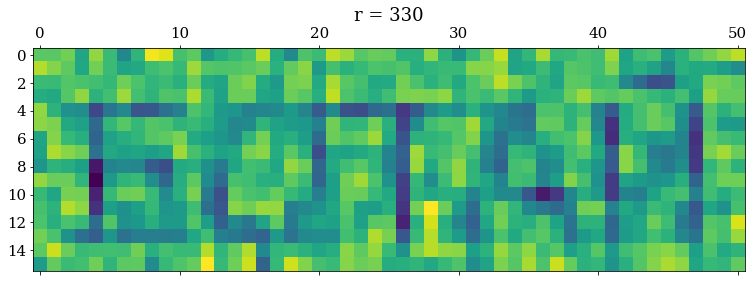

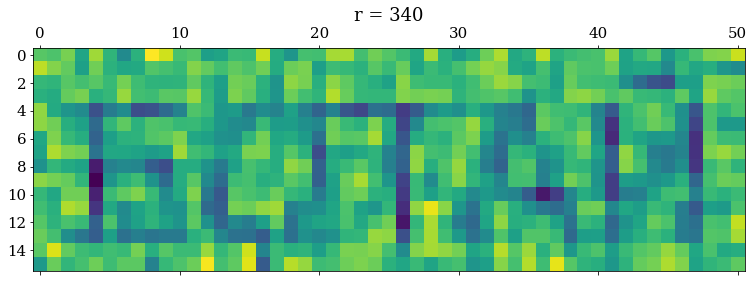

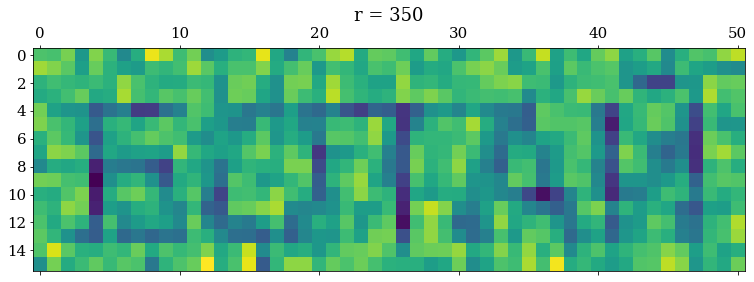

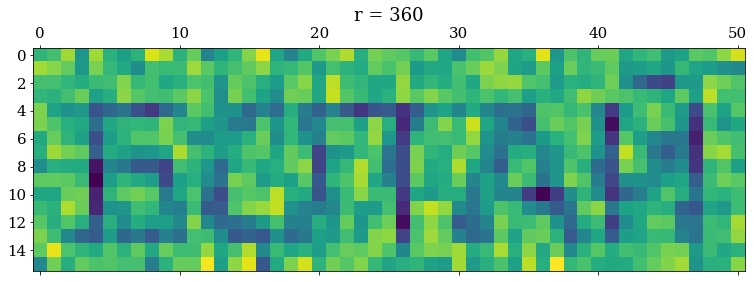

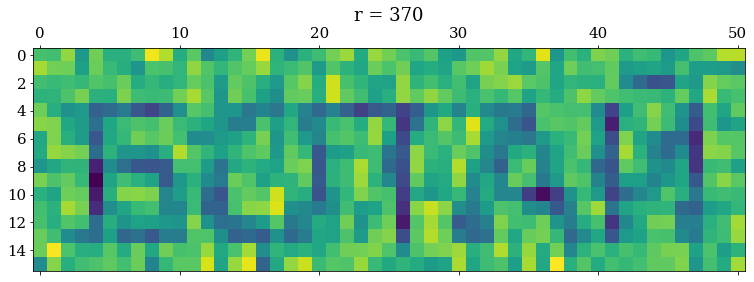

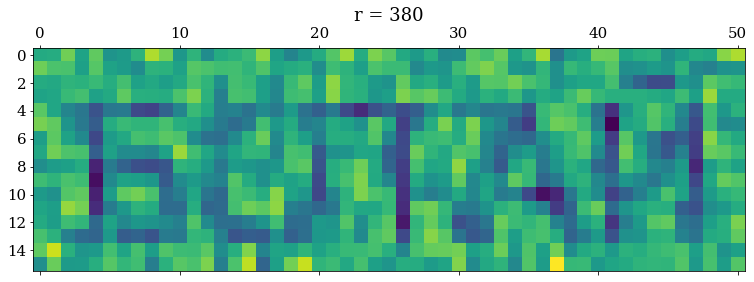

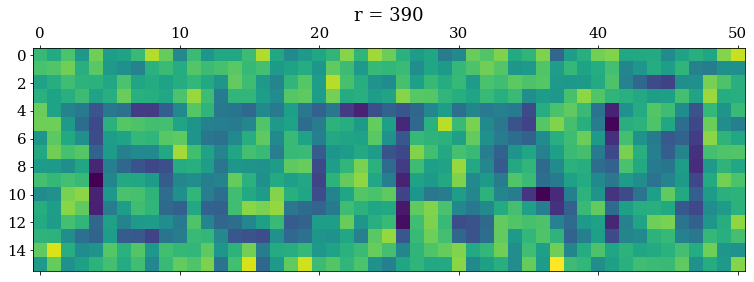

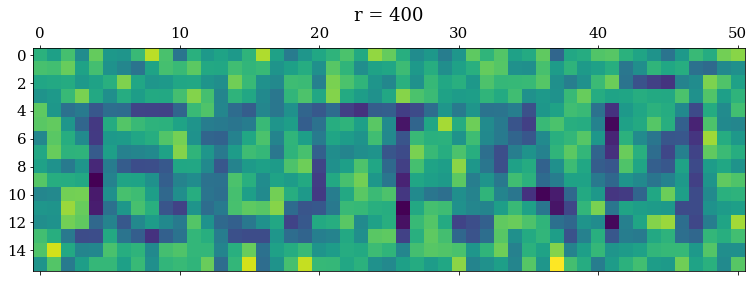

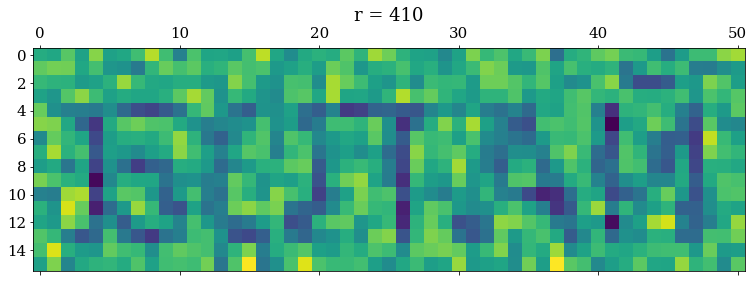

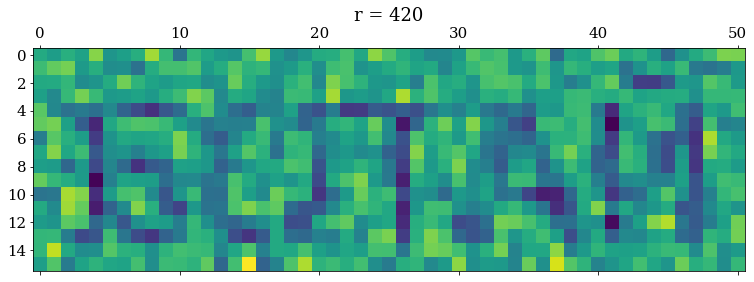

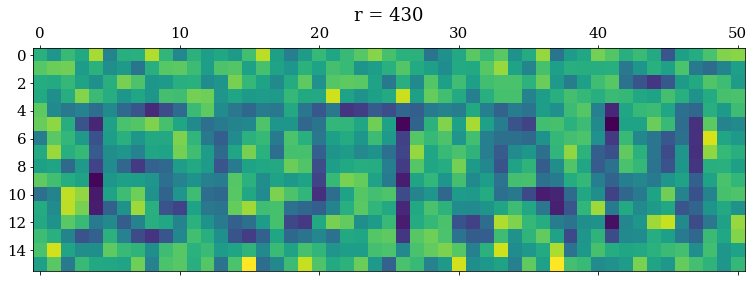

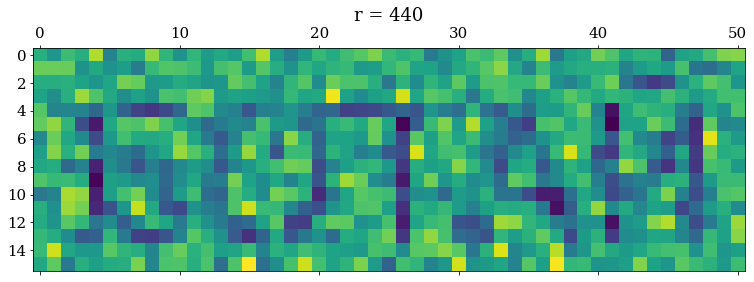

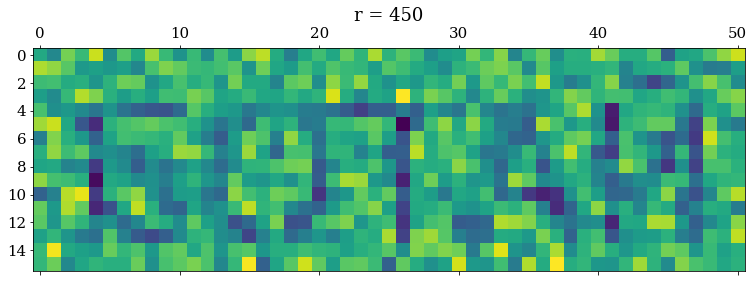

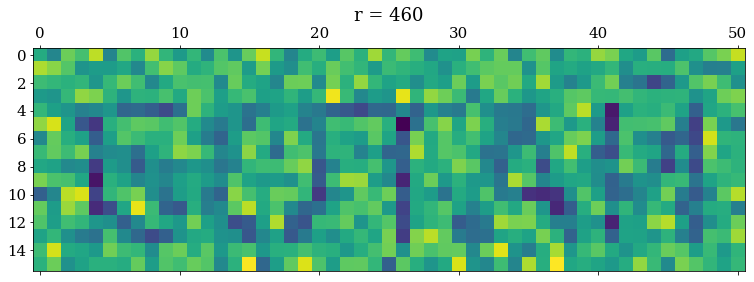

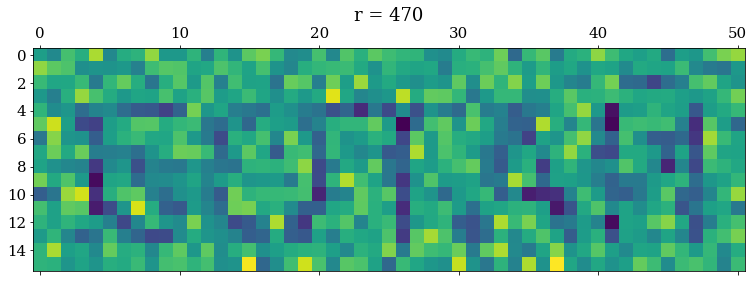

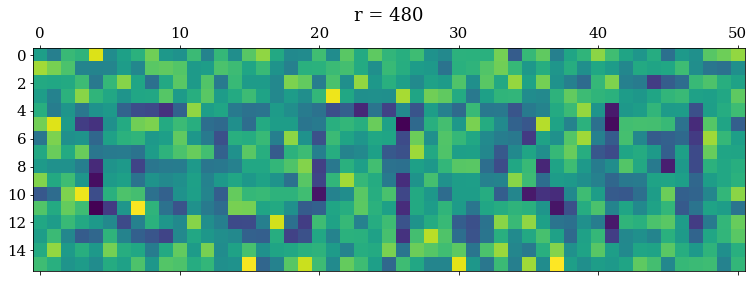

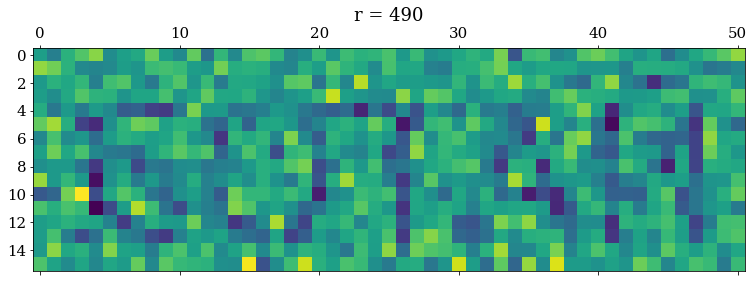

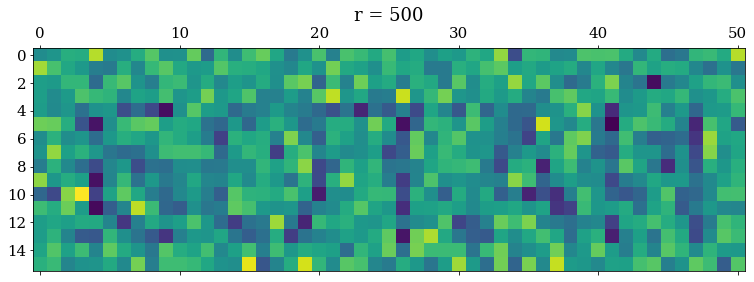

In [191]:
for r in range(10, 501, 10):
    u1, s1, vh1 = u[::, :r], np.diag(s[:r]), vh[:r, ::]
    w = np.linalg.lstsq(s1, u1.T@a)[0]
    a1 = vh1.T@w
    A1 = vec2mat(a1, (16, 51))
    plt.matshow(A1)
    plt.title("r = {}".format(r))

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_43808/696818349.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(s1, u1.T@a)[0]


Text(0.5, 1.0, 'r = 360')

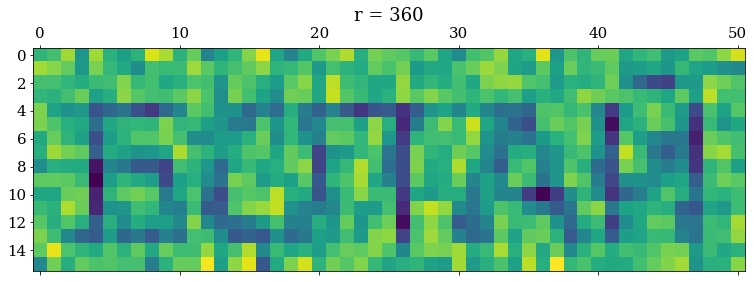

In [192]:
r = 360
u1, s1, vh1 = u[::, :r], np.diag(s[:r]), vh[:r, ::]
w = np.linalg.lstsq(s1, u1.T@a)[0]
a1 = vh1.T@w
A1 = vec2mat(a1, (16, 51))
plt.matshow(A1)
plt.title("r = {}".format(r))

__Вывод:__

- Авторы задачи предложили мне поботать


- Найден субъективный оптимум $r=360$. Раньше ботать не получается, позже уже не надо

### Задача 5

$Cx = 0 \Leftrightarrow ||Cx||_2^2=x^TC^TCx=0$

$L = ||Ax-b||_2^2 - \lambda ||Cx||_2^2 =x^TA^TAx + b^Tb - 2b^TAx - \lambda x^TC^TCx$

$\frac{\partial L}{\partial x} = 0 \Leftrightarrow x^TA^TA - b^TA - \lambda x^TC^TC = 0 $

 Считаем, что $A^TA$ обратима, домножаем на $(A^TA)^{-1}$ справа
 
$(1)\;\;\;x^T - b^TA(A^TA)^{-1} - \lambda x^TC^TC(A^TA)^{-1}=0$ 

Теперь домножаем на $C^T$ справа

$x^TС^T - b^TA(A^TA)^{-1}C^T - \lambda x^TC^TC(A^TA)^{-1}C^T=0$

Пользуемся условием

$(2)\;\;\;\frac{\partial L}{\partial \lambda} = 0 \Leftrightarrow x^TC^TCx=0 \Leftrightarrow Cx=0$

Получаем

$- b^TA(A^TA)^{-1}C^T - \lambda x^TC^TC(A^TA)^{-1}C^T=0 \Leftrightarrow$

$\Leftrightarrow\lambda x^TC^TC(A^TA)^{-1}C^T = - b^TA(A^TA)^{-1}C^T$


Считая что $С(A^TA)^{-1}C^T$ обратима, получаем 

$\lambda Cx = - (C(A^TA)C^T)^{-1}C(A^TA)^{-1}A^Tb$

Подставляем $\lambda Cx$ в $(1)$, получаем

$x = (A^TA)^{-1}A^Tb-(A^TA)^{-1}C^T(C(A^TA)^{-1}C^T)^{-1}C(A^TA)^{-1}A^Tb$

$A^{+}=(A^TA)^{-1}A^T$, тогда

$x = (I-(A^TA)^{-1}C^T(C(A^TA)^{-1}C^T)^{-1}C)A^{+}b$

### Задача 6

$(\overline{r_j}-\overline{r_i}, \overline{r_k}-\overline{r_i})=|\overline{r_j}-\overline{r_i}||\overline{r_k}-\overline{r_i}|\cos\theta_{ijk}$

Введём обозначение $x_{ab}=x_a-x_b$

Пренебрегаем слагаемыми второго порядка малости и выше, получаем уравнение

$(r_{ki},r_{ji})+(r_{ji},dr_{ki})+(r_{ki},dr_{ji})=|r_{ji}||r_{ki}|\left( 1 + \frac{(dr_{ji}, r_{ji})}{|r_{ji}|^2} +\frac{(dr_{ki}, r_{ki})}{|r_{ki}|^2}\right)\cos\theta_{ijk}$


Введём обозначения

$A_{ikj} = r_{ik} - \frac{r_{ij}}{|r_{ij}|}|r_{ik}|\cos\theta_{ijk}$

$A_{ijk} = r_{ij} - \frac{r_{ik}}{|r_{ik}|}|r_{ij}|\cos\theta_{ijk}$

$B_{ijk} = B_{ikj}=\frac{1}{2}\left(|r_{ij}||r_{ik}|\cos\theta_{ijk}-(r_{ik}, r_{ij})\right)$

В новых обозначениях получаем уравнение

$(dr_i, A_{ijk}+A_{ikj})-(dr_j, A_{ikj})-(dr_k, A_{ijk})=B_{ijk}+B_{ikj}$

Если угол $\theta_{ijk}$ не измерен, считаем, что $A_{ijk}=A_{ikj}=B_{ijk}=B_{ikj}=0$. Видно, что при таком выборе обозначений уравнение превращается в тождество при подстановке неизмеренных углов. Также видно, что при совпадении двух индексов константы равны $0$, что эквивалентно незаданным углам

Пользуемся методом множителей Лагранжа

$L = \sum_{i=1}^n||dr_i||^2_2 - \sum_{i=1}^n \lambda_i \sum_{j,k} \left[ (dr_i, A_{ijk}+A_{ikj})-(dr_j, A_{ikj})-(dr_k, A_{ijk})-B_{ijk}-B_{ikj}\right]$


$(1)\;\;\; \frac{\partial L}{\partial dr_i} = 0 \Leftrightarrow dr_i = \frac{\lambda_i}{2}\sum_{j, k}\left(A_{ijk}+A_{ikj}\right)$(коэффициенты с повторяющимися индексами занулены)

$(2)\;\;\; \frac{\partial L}{\partial \lambda_i} = 0 \Leftrightarrow \sum_{j,k} \left[ (dr_i, A_{ijk}+A_{ikj})-(dr_j, A_{ikj})-(dr_k, A_{ijk})-B_{ijk}-B_{ikj}\right]=0$

После подстановки $(1)$ в $(2)$ вылезет система из $n$ линейных уравнений на $\lambda_i$, из которых можно будет найти $\lambda_i$, получить $dr_i$. Можно ожидать, что матрица системы будет разреженной, т.е. для неё есть хорошее малоранговое приближение

$(i-\text{ое уравнение})\;\;\;\lambda_{i}||\sum_{j, k}(A_{ijk}+A_{ikj})||^2 - \sum_{j,k}\lambda_j\left( \sum_{\alpha, \beta}(A_{j\alpha\beta}+A_{j\beta\alpha}), A_{ikj}\right)-\sum_{j, k}\lambda_k\left( \sum_{\alpha, \beta}(A_{k\alpha\beta}+A_{k\beta\alpha}), A_{ijk}\right)=\sum_{j,k}(B_{ijk}+B_{ikj})$

Видно, что третье слагаемое при замене индексов $k\leftrightarrow j$ переходит во второе слагаемое. Также видно, что второе и третье слагаемые не содержат $\lambda_i$, так как зануляются коэффициенты с одинаковыми индексами. $i$-ое уравнение имеет вид

$\lambda_{i}||\sum_{j, k}(A_{ijk}+A_{ikj})||^2 - 2\sum_{j}\lambda_j\sum_{\alpha, \beta, k}\left((A_{j\alpha\beta}+A_{j\beta\alpha}), A_{ikj}\right)=\sum_{j,k}(B_{ijk}+B_{ikj})$

В удобоваримом виде выглядит вот так

$\lambda_1 \left(\sum_{\alpha, \beta}(A_{1\alpha\beta}+A_{1\beta\alpha}), \sum_{k}A_{ik1})\right) + ...-\frac{\lambda_i}{2}||\sum_{j, k}(A_{ijk}+A_{ikj})||^2+...= -\frac{1}{2}\sum_{j,k}(B_{ijk}+B_{ikj})=-\sum_{j,k}B_{ijk}$

Осталось все это запрогать)

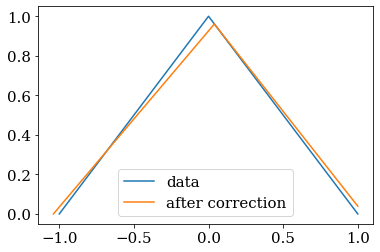

In [440]:
with np.load("data_1.npz") as data:
    r, p, theta, dr = data['r'], data['p'], data['theta'], data['dr']
    
x, y = r.T
dx, dy = dr.T

plt.plot(x, y, label="data")
plt.plot(x+dx, y+dy, label="after correction")
plt.legend()

In [478]:
from sklearn.linear_model import Lasso

def AB(r, theta, p):
    n = r.shape[0]
    A = [[[[0.0, 0.0] for _ in range(n)] for _ in range(n)] for _ in range(n)]
    B = [[[0.0 for _ in range(n)] for _ in range(n)] for _ in range(n)]
    p0 = (p-1).tolist()
    #Не знаю, как это адекватно через numpy организовать, буду быдлокодить
    for i in range(n):
        for j in range(n):
            for k in range(n):
                idx = -1
                try:
                    idx = p0.index([i,j,k])
                except ValueError:
                    try:
                        idx = p0.index([i,k,j])
                    except ValueError:
                        pass
                
                if idx > -1:
                    A[i][k][j] = r[i]-r[k]-np.linalg.norm(r[i]-r[k],ord=2)/np.linalg.norm(r[i]-r[j],ord=2)*np.cos(theta[idx])
                    A[i][j][k] = r[i]-r[j]-np.linalg.norm(r[i]-r[j], ord=2)/np.linalg.norm(r[i]-r[k], ord=2)*np.cos(theta[idx])
                    B[i][j][k] = 0.5*np.linalg.norm(r[i]-r[j], ord=2)*np.linalg.norm(r[i]-r[k], ord=2)*np.cos(theta[idx])-0.5*np.dot(r[i]-r[k], r[i]-r[j])       
    
    return np.array(A), np.array(B)


def sum1(A, i, j):
    n = A.shape[0]
    temp = np.array([0.0, 0.0])
    for k in range(n):
        temp += A[i,k,j]
    return temp


def sum2A(A, i):
    n = A.shape[0]
    temp = np.array([0.0, 0.0])
    for j in range(n):
        for k in range(n):
            temp += A[i, j, k] + A[i, k, j]
    return temp

def sum2B(B, i):
    n = B.shape[0]
    temp = np.array(0.0)
    for j in range(n):
        for k in range(n):
            temp -= 0.5*(B[i, j, k] + B[i, k, j])
    return temp
    
    
def system_b(r, theta, p):
    A, B = AB(r, theta, p)
    n = A.shape[0]
    S = np.zeros((n,n))
    b = np.zeros((n,1))
    for i in range(n):
        b[i] = -sum2B(B, i)
        for j in range(n):
            if i == j:
                S[i, j] = -0.5*np.linalg.norm(sum2A(A, i),ord=2)
            else:
                S[i, j] = np.dot(sum2A(A, j), sum1(A,i,j))
    return A, B, S, b


def sol_lasso(r, theta, p):
    n = r.shape[0]
    A, B, S, b = system_b(r, theta, p)
    model = Lasso(alpha=1.0, fit_intercept=False)
    model.fit(S, b)
    l = model.coef_
    dr = [[0.0, 0.0] for _ in range(n)]
    for i in range(n): 
        dr[i] = l[i]/2 * sum2(A, i)
    return np.array(dr)

def sol_lstsq(r, theta, p):
    n = r.shape[0]
    A, B, S, b = system_b(r, theta, p)
    l = np.linalg.lstsq(S, b, rcond=None)[0]
    
    dr = [[0.0, 0.0] for _ in range(n)]
    for i in range(n): 
        dr[i] = l[i]/2 * sum2(A, i)
    return np.array(dr)

def angles(r, p):
    theta = np.zeros(p.shape[0])
    count = 0
    p0 = (p-1).tolist()
    for i, j, k in p0:
        temp = np.dot(r[i]-r[j], r[i]-r[k])/np.linalg.norm(r[i]-r[j], ord=2)/np.linalg.norm(r[i]-r[k],ord=2)
        theta[count] = np.arccos(temp)
        count += 1
    return theta

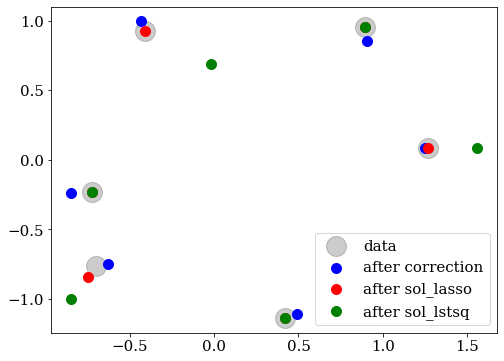

In [479]:
with np.load("data_2.npz") as data:
    r, p, theta, dr = data['r'], data['p'], data['theta'], data['dr']
    
x, y = r.T
dx, dy = dr.T
dx_lasso, dy_lasso = sol_lasso(r, theta, p).T
dx_lstsq, dy_lstsq = sol_lstsq(r, theta, p).T

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="black", label="data", s=400, alpha=0.2)
plt.scatter(x+dx, y+dy, color="blue", label="after correction", s=100)
plt.scatter(x+dx_lasso, y+dy_lasso, color="red", label="after sol_lasso", s=100)
plt.scatter(x+dx_lstsq, y+dy_lstsq, color="green", label="after sol_lstsq", s=100)
plt.legend()

In [481]:
r_lasso = r+sol_lasso(r, theta, p)
r_lstsq = r+sol_lstsq(r, theta, p)

print("sol_lasso : ", angles(r_lasso, p))
print("sol_lstsq : ", angles(r_lstsq, p))
print("data      : ", theta)

sol_lasso :  [1.60244721 1.78332771 0.14900583 1.21385168]
sol_lstsq :  [1.34827534 2.30829296 0.29572171 1.62005206]
data      :  [1.5708   1.5708   0.523599 1.0472  ]


__Вывод:__

- видимо, я где-то ошибся, пока не могу понять где


- sklearn.linear_model.Lasso используется, чтобы найти разреженное решение на $\lambda$, что должно хорошо работать, когда матрица $S$ разрежена